In [13]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import multiclass
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

Učitavanje predprocesiranih podataka, podela na test, trening i validacioni skup i vektorizacija.

In [2]:
news = pd.read_csv('data/vesti.csv')

In [3]:
X = news['text']
y = news['category']

In [4]:
X_train_and_validation, X_test, y_train_and_validation, y_test = model_selection.\
    train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 4)

In [5]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer.fit(X_train_and_validation.values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [6]:
X_train_and_validation = tfidf_vectorizer.transform(X_train_and_validation.values.astype('U'))
X_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [7]:
y_train_and_validation = y_train_and_validation.astype('category')
y_test = y_test.astype('category')

In [8]:
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X_train_and_validation,\
y_train_and_validation, train_size = 0.8, random_state = 4, stratify = y_train_and_validation )

In [9]:
classes = dict(enumerate(y_train.cat.categories))
y_validation=y_validation.cat.codes
y_train = y_train.cat.codes
y_test = y_test.cat.codes

Klasifikacija za više klasa pomoću Bayes algoritma. 

In [11]:
alphas=[0.005,0.006,0.007,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
best_acc=0
best_alpha=None
bayesArray=[]
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation,y_predict)
    bayesArray.append(accuracy)
    if accuracy> best_acc:
        best_acc = accuracy
        best_alpha = alpha
print('Najbolja preciznost na test skupu je: ', best_acc)
print('Najbolji alfa parametar modela su: ', best_alpha)

Najbolja preciznost na test skupu je:  0.6969867748722572
Najbolji alfa parametar modela su:  0.01


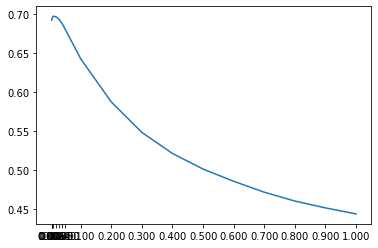

In [12]:
plt.plot(alphas,bayesArray)
plt.xticks(alphas)
plt.show()

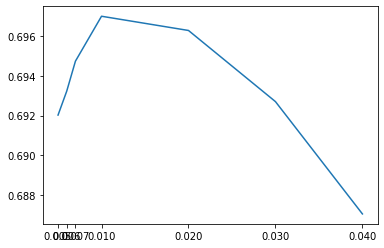

In [13]:
plt.plot(alphas[0:7],bayesArray[0:7])
plt.xticks(alphas[0:7])
plt.show()

In [15]:
model = MultinomialNB(alpha=best_alpha)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))
print(matrix)
print(metrics.classification_report(y_test, y_predict, target_names=classes.values()))

0.6888797351518757
[[ 775   14    6 ...   32    3   10]
 [  11  668    9 ...   35   10    5]
 [   1    6  986 ...  181   10   37]
 ...
 [   4    2   34 ... 5088    6   21]
 [   6   19   27 ...  113  344    6]
 [   6    5   29 ...   30    3 1987]]
                  precision    recall  f1-score   support

  ARTS & CULTURE       0.78      0.61      0.69      1264
    BLACK VOICES       0.69      0.45      0.54      1488
        BUSINESS       0.58      0.51      0.54      1950
         COLLEGE       0.73      0.26      0.38       377
          COMEDY       0.66      0.50      0.57      1683
           CRIME       0.60      0.58      0.59      1120
         DIVORCE       0.84      0.68      0.75      1126
       EDUCATION       0.73      0.33      0.45       331
   ENTERTAINMENT       0.65      0.83      0.73      5287
     ENVIRONMENT       0.66      0.19      0.29       411
           FIFTY       0.85      0.37      0.51       462
    FOOD & DRINK       0.74      0.83      0.78      205

Usled velikog broja klasa, model ne pronalazi najbolje rešenje, a konkretne ocene mogu se videti u izveštaju iznad.

Sledi klasifikacija pomoću knn modela. Takođe je isprobano više parametara i kao najbolji se pokazao 17 kao broj suseda.

In [ ]:
n_neighbors_list=list(range(1, 21))
best_acc_test=0
best_acc_train=0
best_n=None
knnArray=[]
for n_neighbors in n_neighbors_list:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_validation)
    accuracy_test = accuracy_score(y_validation,y_predict)
    knnArray.append(accuracy_test)
    if accuracy_test> best_acc_test:
        best_acc_test = accuracy_test
        best_n = n_neighbors
print('Najbolji rezultat na test skupu je: ',best_acc_test)
print('Najbolji parametri modela su: ', best_n)

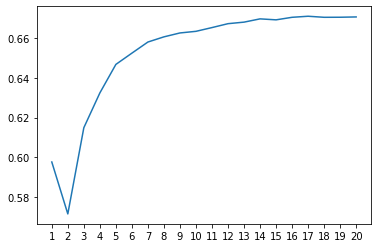

In [14]:
plt.plot(n_neighbors_list,knnArray)
plt.xticks(n_neighbors_list)
plt.show()

In [20]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=17)
knn_model.fit(X_train, y_train)
y_predict = model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))
print(matrix)
print(metrics.classification_report(y_test, y_predict, target_names=classes.values()))

[[ 782   15   10 ...   35    4   14]
 [  12  734   10 ...   27   10    6]
 [   5   10 1044 ...  105    9   32]
 ...
 [  10   10   60 ... 4465   21   11]
 [   5   15   28 ...   87  349    6]
 [   7   12   33 ...   33   12 1863]]
                  precision    recall  f1-score   support

  ARTS & CULTURE       0.78      0.62      0.69      1264
    BLACK VOICES       0.64      0.49      0.56      1488
        BUSINESS       0.58      0.54      0.56      1950
         COLLEGE       0.55      0.42      0.48       377
          COMEDY       0.60      0.59      0.59      1683
           CRIME       0.53      0.53      0.53      1120
         DIVORCE       0.69      0.76      0.73      1126
       EDUCATION       0.58      0.43      0.49       331
   ENTERTAINMENT       0.65      0.79      0.72      5287
     ENVIRONMENT       0.43      0.25      0.31       411
           FIFTY       0.66      0.47      0.55       462
    FOOD & DRINK       0.60      0.86      0.71      2050
       GOOD NEWS 

Prema ocenama ova klasifikicija se pokazala nešto lošija nego Bajes klasifikacija. 

Naredna dva modela su se pokazala kao najbolja. Ocene za njih i raspodelu po klasama možemo videti u nastavku.

In [16]:
ovr = multiclass.OneVsRestClassifier(svm.LinearSVC(loss = 'hinge'))
ovr.fit(X_train, y_train)
y_predicted_ovr = ovr.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovr, target_names=classes.values()))

                  precision    recall  f1-score   support

  ARTS & CULTURE       0.77      0.71      0.74      1264
    BLACK VOICES       0.71      0.55      0.62      1488
        BUSINESS       0.64      0.58      0.61      1950
         COLLEGE       0.62      0.56      0.59       377
          COMEDY       0.69      0.65      0.67      1683
           CRIME       0.61      0.64      0.62      1120
         DIVORCE       0.82      0.81      0.81      1126
       EDUCATION       0.56      0.53      0.54       331
   ENTERTAINMENT       0.77      0.81      0.79      5287
     ENVIRONMENT       0.56      0.32      0.40       411
           FIFTY       0.65      0.52      0.58       462
    FOOD & DRINK       0.77      0.85      0.81      2050
       GOOD NEWS       0.68      0.51      0.58       461
           GREEN       0.53      0.42      0.47       862
  HEALTHY LIVING       0.66      0.39      0.49      2199
   HOME & LIVING       0.86      0.87      0.87      1342
          IMP

Za najbolji model izdvojili uvideli smo da najlošiju vrednost f1 mere imaju kategorije Enviroment i Green, i zbog toga izdvajamo par vesti iz tih kategorija.

In [16]:
news = pd.read_json("data/News_Category_Dataset_v2.json", lines = True)
news1 = news[news.category.isin(['GREEN'])].headline
news2 = news[news.category.isin(['ENVIRONMENT'])].headline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(news1.head())
print(news2.head())

7407    McDonald's Says Its Packaging Will Be 100 Percent Green By 2025        
7712    Fourth San Francisco Swimmer In A Month Attacked By Sea Lion           
7766    Your Questions About The California Mudslides, Answered                
7855    Why The California Mudslides Have Been So Deadly                       
7877    The Agency That Approves Pipelines Is About To Get A Trump-Era Overhaul
Name: headline, dtype: object
125421    Sky Vets Perform Incredible Rescue To Save Wild Lioness (GRAPHIC VIDEO)  
125422    Animal Photos Of The Week: Baby Panda Goes For A Stroll                  
125423    Washington Mudslide Menacing Fabled Pacific Northwest Salmon, Trout River
125424    America's Exotic Pet Obsession Is Out Of Control (PHOTOS, VIDEO)         
125494    Time to Leave Our Bad Carbon Boyfriend                                   
Name: headline, dtype: object


In [17]:
ovo = multiclass.OneVsOneClassifier(linear_model.LogisticRegression(max_iter = 1000))
ovo.fit(X_train, y_train)
y_predicted_ovo = ovo.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovo, target_names=classes.values()))

                  precision    recall  f1-score   support

  ARTS & CULTURE       0.83      0.59      0.69      1264
    BLACK VOICES       0.75      0.42      0.53      1488
        BUSINESS       0.63      0.52      0.57      1950
         COLLEGE       0.59      0.38      0.46       377
          COMEDY       0.71      0.58      0.64      1683
           CRIME       0.65      0.55      0.59      1120
         DIVORCE       0.88      0.67      0.76      1126
       EDUCATION       0.66      0.34      0.45       331
   ENTERTAINMENT       0.66      0.83      0.74      5287
     ENVIRONMENT       0.79      0.11      0.19       411
           FIFTY       0.79      0.16      0.27       462
    FOOD & DRINK       0.75      0.79      0.77      2050
       GOOD NEWS       0.85      0.40      0.54       461
           GREEN       0.54      0.33      0.41       862
  HEALTHY LIVING       0.74      0.30      0.43      2199
   HOME & LIVING       0.92      0.74      0.82      1342
          IMP